## Jintao Hu,
"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

In [1]:
!pip install plotly

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix

In [3]:
#http://pandas.pydata.org/pandas-docs/stable/visualization.html
#http://www.analyticsvidhya.com/blog/2014/08/baby-steps-python-performing-exploratory-analysis-python/

#import python packages (these are the most popular ones)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

print(sns.__version__)    #check seaborn version

0.9.0


In [4]:
df = pd.read_csv("movie_metadata.csv")

## 1. Business understanding 
The goal of this project is to predict movie success. Search
Google using such key words as “predicting movie success” and understand the
background of this prediction problem. Based on this research, write a summary of this
business problem you’re trying to solve. Use bulleted lists and/or numbers in markdown
cells. Answer the following questions as well:

    • What are the project’s goals?
        -The system is used to predict the past as well as the future of movie for the purpose of business certainty or simply a theoretical condition in which decision making (the success of the movie) is without risk.
        
    • If you’re hired as a data/business analyst to predict how well a movie will perform in theaters, what kind of data would you collect?
        -If I am hired as data/business analyst to predict how well a movie will perform in theaters,I will collect movie title, IMDB rating, plot description, budget, box office gross, opening weekend gross, the number of Academy Awards that actors and directors in each movie had won prior to that movie, and also the number of Best Picture films that actors and directors in each movie had been involved in, also prior to that movie. 
        
    • What variables are highly correlated to imdb score? In this project, you will use imdb_score to measure a movie’s success.
        - Each IMDB rating comes with both a numeric rating and the number of votes cast.

In [5]:
df.corr()["imdb_score"]

num_critic_for_reviews       0.305303
duration                     0.261662
director_facebook_likes      0.170802
actor_3_facebook_likes       0.052633
actor_1_facebook_likes       0.076099
gross                        0.198021
num_voted_users              0.410965
cast_total_facebook_likes    0.085787
facenumber_in_poster        -0.062958
num_user_for_reviews         0.292475
budget                       0.030688
title_year                  -0.209167
actor_2_facebook_likes       0.083808
imdb_score                   1.000000
aspect_ratio                 0.059445
movie_facebook_likes         0.247049
Name: imdb_score, dtype: float64

According to the correlation analysis above,number of critics for reviews and number of voted users have high positive correlation with IMDb score.On the other hand,number of users for reviews and movie duration have weaker correlations with IMDb score than previous two.

## 2. Data understanding
The dataset contains a large number of variables with different
types (e.g., numerical, categorial). Provide a brief summary of data understanding.
Specifically, you need to:
• Describe data
• Identify data quality issues
• Identify data types
• Identify value counts of a selective list of columns considered to be important to
predict a movie’s success (imdb_score)

In [6]:
len(df)

5043

In [7]:
# Describe data
df.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                133.000000              614.000000  5.340988e+06   
50%                371.500000              988.000000  2.551750e+07   
75%                636.000000            11000.000000  6.230944e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.043000e+03                5043.000000           5030.000000   
mean      8.366816e+04                9699.063851              1.371173   
std       1.384853e+05               18163.799124              2.013576   
min       5.000000e+00                   0.000000              0.000000   
25%       8.593500e+03                1411.000000              0.000000   
50%       3.435900e+04                3090.000000              1.000000   
75%       9.630900e+04               13756.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           5022.000000  4.551000e+03  4935.000000   
mean             272.770808  3.975262e+07  2002.470517   
std              377.982886  2.061149e+08    12.474599   
min                1.000000  2.180000e+02  1916.000000   
25%               65.000000  6.000000e+06  1999.000000   
50%              156.000000  2.000000e+07  2005.000000   
75%              326.000000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             5030.000000  5043.000000   4714.000000           5043.000000  
mean              1651.754473     6.442138      2.220403           7525.964505  
std               4042.438863     1.125116      1.385113          19320.445110  
min                  0.000000     1.600000      1.180000              0.000000  
25%                281.000000     5.800000      1.850000              0.000000  
50%                595.000000     6.600000      2.350000            166.000000  
75%                918.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

In [8]:
# Identify data quality issues
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [9]:
# Identify data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

 There are many incomplete values within the data set.
 It would be critical to drop all rows with null values.
 While correlations do not use objects,but only use integers,some object rows are actually insignificant.

In [10]:
df['title_year'].value_counts().head()

2009.0    260
2014.0    252
2006.0    239
2013.0    237
2010.0    230
Name: title_year, dtype: int64

In [11]:
df['director_name'].value_counts().head()

Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
Name: director_name, dtype: int64

In [12]:
df['duration'].value_counts().head()

90.0     161
100.0    141
101.0    139
98.0     135
97.0     131
Name: duration, dtype: int64

In [13]:
df['num_voted_users'].value_counts().head()

57      5
6       4
6025    3
374     3
53      3
Name: num_voted_users, dtype: int64

In [14]:
df['budget'].value_counts().head()

20000000.0    174
15000000.0    143
25000000.0    142
30000000.0    141
10000000.0    135
Name: budget, dtype: int64

In [15]:
df['content_rating'].value_counts().head()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Name: content_rating, dtype: int64

## 3. Data preparation 
Real-world datasets need to be pre-processed (e.g., cleaning,
transforming) prior to formal analysis. Perform all necessary data cleaning and
No reproduction/distribution permitted
transformation activities. If necessary, you need to create new variables from existing variables. See an example.

In [16]:
df1 = df [['movie_title' ,'director_name','num_critic_for_reviews' , 'duration' ,  'actor_1_facebook_likes' , 'gross', 'budget' ,'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes']]

In [17]:
df1.head(2)

movie_title   director_name  \
0                                    Avatar    James Cameron   
1  Pirates of the Caribbean: At World's End   Gore Verbinski   

   num_critic_for_reviews  duration  actor_1_facebook_likes        gross  \
0                   723.0     178.0                  1000.0  760505847.0   
1                   302.0     169.0                 40000.0  309404152.0   

        budget                           genres actor_1_name  num_voted_users  \
0  237000000.0  Action|Adventure|Fantasy|Sci-Fi  CCH Pounder           886204   
1  300000000.0         Action|Adventure|Fantasy  Johnny Depp           471220   

   cast_total_facebook_likes  \
0                       4834   
1                      48350   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   

  language content_rating       budget  title_year  actor_2_facebook_likes  \
0  English          PG-13  237000000.0      2009.0                   936.0   
1  English          PG-13  300000000.0      2007.0                  5000.0   

   imdb_score  movie_facebook_likes  
0         7.9                 33000  
1         7.1                     0

In [18]:
df1 = df.dropna()
len(df1)

3756

In [19]:
df1['movie_title'].value_counts().head(5)

Home                         3
The Fast and the Furious     3
Victor Frankenstein          3
Halloween                    3
King Kong                    3
Name: movie_title, dtype: int64

In [20]:
df1 = df1.drop_duplicates()
len(df1)

3723

In [21]:
df1.corr()

num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.227619   
duration                                 0.227619  1.000000   
director_facebook_likes                  0.175715  0.180397   
actor_3_facebook_likes                   0.245440  0.120776   
actor_1_facebook_likes                   0.165648  0.082901   
gross                                    0.460797  0.242610   
num_voted_users                          0.591586  0.338953   
cast_total_facebook_likes                0.233781  0.117736   
facenumber_in_poster                    -0.035603  0.027522   
num_user_for_reviews                     0.562596  0.352083   
budget                                   0.103921  0.067380   
title_year                               0.420184 -0.131689   
actor_2_facebook_likes                   0.251119  0.126651   
imdb_score                               0.349825  0.367388   
aspect_ratio                             0.179809  0.153353   
movie_facebook_likes                     0.703579  0.212977   

                           director_facebook_likes  actor_3_facebook_likes  \
num_critic_for_reviews                    0.175715                0.245440   
duration                                  0.180397                0.120776   
director_facebook_likes                   1.000000                0.120584   
actor_3_facebook_likes                    0.120584                1.000000   
actor_1_facebook_likes                    0.090467                0.252450   
gross                                     0.139729                0.281238   
num_voted_users                           0.302766                0.257632   
cast_total_facebook_likes                 0.120076                0.485596   
facenumber_in_poster                     -0.047577                0.104853   
num_user_for_reviews                      0.218876                0.200485   
budget                                    0.018105                0.038207   
title_year                               -0.045718                0.116479   
actor_2_facebook_likes                    0.117858                0.550328   
imdb_score                                0.193125                0.064187   
aspect_ratio                              0.037171                0.047918   
movie_facebook_likes                      0.162641                0.259922   

                           actor_1_facebook_likes     gross  num_voted_users  \
num_critic_for_reviews                   0.165648  0.460797         0.591586   
duration                                 0.082901  0.242610         0.338953   
director_facebook_likes                  0.090467  0.139729         0.302766   
actor_3_facebook_likes                   0.252450  0.281238         0.257632   
actor_1_facebook_likes                   1.000000  0.142577         0.178009   
gross                                    0.142577  1.000000         0.622714   
num_voted_users                          0.178009  0.622714         1.000000   
cast_total_facebook_likes                0.946075  0.227955         0.243834   
facenumber_in_poster                     0.055769 -0.034389        -0.035822   
num_user_for_reviews                     0.121393  0.545656         0.779191   
budget                                   0.016027  0.098318         0.065398   
title_year                               0.095997  0.053163         0.023488   
actor_2_facebook_likes                   0.390411  0.243977         0.239126   
imdb_score                               0.092927  0.215510         0.482583   
aspect_ratio                             0.056816  0.065903         0.087079   
movie_facebook_likes                     0.128804  0.358630         0.514855   

                           cast_total_facebook_likes  facenumber_in_poster  \
num_critic_for_reviews                      0.233781             -0.035603   
duration                                    0.117736              0.027522   
director_facebook_likes          

In [22]:
df1.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 28 columns):
color                        3723 non-null object
director_name                3723 non-null object
num_critic_for_reviews       3723 non-null float64
duration                     3723 non-null float64
director_facebook_likes      3723 non-null float64
actor_3_facebook_likes       3723 non-null float64
actor_2_name                 3723 non-null object
actor_1_facebook_likes       3723 non-null float64
gross                        3723 non-null float64
genres                       3723 non-null object
actor_1_name                 3723 non-null object
movie_title                  3723 non-null object
num_voted_users              3723 non-null int64
cast_total_facebook_likes    3723 non-null int64
actor_3_name                 3723 non-null object
facenumber_in_poster         3723 non-null float64
plot_keywords                3723 non-null object
movie_imdb_link              3723 non-

In [24]:
df1 = df1.drop('color', axis=1)

After cleaning we have 3723 rows of data to analyze

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 27 columns):
director_name                3723 non-null object
num_critic_for_reviews       3723 non-null float64
duration                     3723 non-null float64
director_facebook_likes      3723 non-null float64
actor_3_facebook_likes       3723 non-null float64
actor_2_name                 3723 non-null object
actor_1_facebook_likes       3723 non-null float64
gross                        3723 non-null float64
genres                       3723 non-null object
actor_1_name                 3723 non-null object
movie_title                  3723 non-null object
num_voted_users              3723 non-null int64
cast_total_facebook_likes    3723 non-null int64
actor_3_name                 3723 non-null object
facenumber_in_poster         3723 non-null float64
plot_keywords                3723 non-null object
movie_imdb_link              3723 non-null object
num_user_for_reviews         3723 non-

## 4. Business Intelligence
Potentially, you can answer a lot of interesting questions using business intelligence techniques we’ve learned. The focus should be on what variables are good predictors for a movie’s success. You must use a variety of data visualization and business intelligence techniques. This is the most important component of this project. If this section is “too thin”, your project will receive a very low grade.
- Pivot tables
- Data visualization with business questions

In [26]:
df.groupby(['imdb_score']).mean().T

imdb_score                         1.6         1.7           1.9         2.0  \
num_critic_for_reviews           84.00        12.0  4.866667e+01        16.0   
duration                        115.00        91.0  9.100000e+01       101.5   
director_facebook_likes         209.00        11.0  5.533333e+01        44.0   
actor_3_facebook_likes           41.00       500.0  2.000000e+02       437.0   
actor_1_facebook_likes          569.00       719.0  7.193333e+02       807.0   
gross                      73000942.00         NaN  1.164199e+07   5694308.0   
num_voted_users               74351.00      4377.0  3.361667e+04      8547.0   
cast_total_facebook_likes       714.00      3090.0  1.796000e+03      2926.5   
facenumber_in_poster              1.00         0.0  1.666667e+00         2.0   
num_user_for_reviews            233.00        66.0  1.656667e+02        34.0   
budget                     13000000.00  65000000.0  1.533333e+07  15500000.0   
title_year                     2011.00      2012.0  2.005667e+03      2010.5   
actor_2_facebook_likes           69.00       611.0  4.563333e+02       752.0   
aspect_ratio                      1.85         NaN  1.993333e+00         2.1   
movie_facebook_likes          62000.00         0.0  4.266667e+01       223.0   

imdb_score                          2.1           2.2           2.3  \
num_critic_for_reviews     5.033333e+01  2.866667e+01  9.066667e+01   
duration                   9.633333e+01  9.966667e+01  9.400000e+01   
director_facebook_likes    6.466667e+01  1.846667e+02  3.390000e+02   
actor_3_facebook_likes     2.360000e+02  2.320000e+02  4.736667e+02   
actor_1_facebook_likes     6.176667e+02  4.353333e+02  7.453333e+02   
gross                      5.401735e+06  1.701065e+07  1.505900e+07   
num_voted_users            1.724167e+04  1.389233e+04  4.415200e+04   
cast_total_facebook_likes  1.766333e+03  1.260667e+03  3.448000e+03   
facenumber_in_poster       3.000000e+00  3.333333e-01  4.000000e+00   
num_user_for_reviews       2.160000e+02  8.966667e+01  4.163333e+02   
budget                     1.320000e+07  4.250000e+07  1.666667e+07   
title_year                 2.003333e+03  2.010667e+03  2.003333e+03   
actor_2_facebook_likes     2.923333e+02  3.313333e+02  6.503333e+02   
aspect_ratio               2.016667e+00  1.815000e+00  2.016667e+00   
movie_facebook_likes       8.133333e+01  4.613333e+02  5.746667e+02   

imdb_score                         2.4          2.5        2.6  ...  \
num_critic_for_reviews          152.50        25.00       19.0  ...   
duration                        120.00        95.00       78.0  ...   
director_facebook_likes          83.00        45.50        9.5  ...   
actor_3_facebook_likes           42.00       427.50       36.5  ...   
actor_1_facebook_likes          430.00       624.00      165.5  ...   
gross                      13565884.50  27141959.00        NaN  ...   
num_voted_users               53542.00     10074.50     1655.0  ...   
cast_total_facebook_likes       628.50      1783.50      428.5  ...   
facenumber_in_poster              0.00         1.00        0.0  ...   
num_user_for_reviews            863.00        93.00       11.5  ...   
budget                     49000000.00  18000000.00  2050000.0  ...   
title_year                     2001.50      2003.50     2013.0  ...   
actor_2_facebook_likes           89.50       505.00      151.0  ...   
aspect_ratio                      2.35         1.85        2.1  ...   
movie_facebook_likes           1000.00       388.50     1100.0  ...   

imdb_score                          8.5           8.6           8.7  \
num_critic_for_reviews     2.581250e+02  2.040000e+02  1.535455e+02   
duration                   1.255417e+02  1.076000e+02  1.136923e+02   
director_facebook_likes    6.146905e+03  5.412917e+03  1.836600e+03   
actor_3_facebook_likes     2.219750e+03  1.573533e+03  2.706154e+02   
actor_1_facebook_likes     7.594500e+03  5.074333e+03  5.472231e+03   
gross              

In [27]:
df1['profit'] = df['gross'] - df['budget']

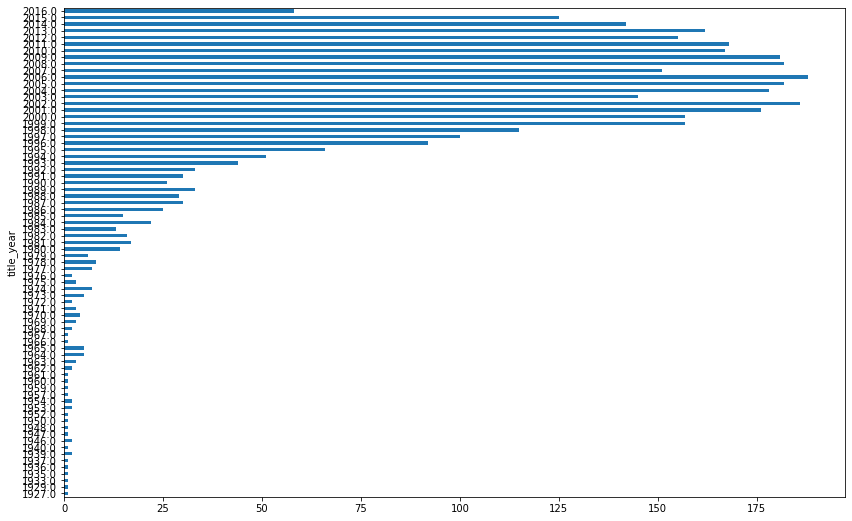

In [28]:
df1.groupby('title_year').count()['imdb_score'].plot(kind="barh", figsize=(14,9));

In modern times,more movies are shoot, over past 2 decades, include a higher volume of both higher-scoring and lower-scoring movies.
The title year is insignificant to the IMDB_score.

In [29]:
dfprof = df1.sort_values(by=['profit'], ascending=False).head(50)
px.scatter(dfprof, x="budget", y="profit", title="How profit related to budget", trendline='ols', color="imdb_score", size="imdb_score", hover_data=['movie_title', 'director_name'])

C:\Users\jintaohu\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [30]:
dfdura = df1.sort_values(by=['imdb_score'], ascending=False).head(50)
px.scatter(dfdura, x="duration", y="imdb_score", title="How duration related to imdb_score", trendline='ols', color="imdb_score", size="imdb_score", hover_data=['movie_title', 'director_name'])

C:\Users\jintaohu\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [31]:
dfgross = df1.sort_values(by=['imdb_score'], ascending=False).head(50)
px.scatter(dfgross, x="gross", y="imdb_score", title="How gross related to imdb_score", trendline='ols', color="imdb_score", size="imdb_score", hover_data=['movie_title', 'director_name'])

C:\Users\jintaohu\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



The three graphs above show correlation between budget and profit,duration and imdb_score,budget and imdb_score.
As conclusion imdb_score is not really affected by duration or money investment.

In [32]:
dfvote = df1.sort_values(by=['num_voted_users'], ascending=False).head(50)
px.scatter(dfvote, x="num_voted_users", y="imdb_score", title="How imdb_score related to num_voted_users", trendline='ols', color="imdb_score", size="imdb_score", hover_data=['movie_title'], labels={'num_voted_users':'User Votes'})

C:\Users\jintaohu\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [33]:
dirsc = df1.groupby('director_name').mean().sort_values(by='imdb_score', ascending=False).head(50)
dirprof = df1.groupby('director_name').mean().sort_values(by='profit', ascending=False).head(50)

dirsc = dirsc.reset_index()
dirprof = dirprof.reset_index()

In [34]:
px.bar(dirsc, x='director_name', y='imdb_score', color='imdb_score', title="Directors' scores", height=800)

In [35]:
px.bar(dirsc, x='director_name', y='budget', color='imdb_score', title="Movies' budget", height=800)

In [36]:
px.bar(dirsc, x='director_name', y='profit', color='imdb_score', title="Directors' profits", height=800)

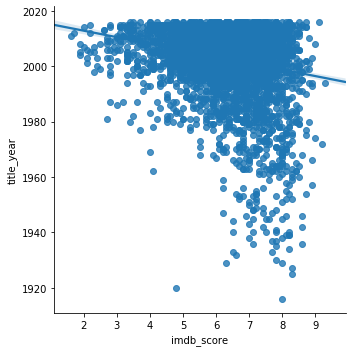

In [37]:
sns.lmplot('imdb_score', 'title_year', data=df, fit_reg=True);

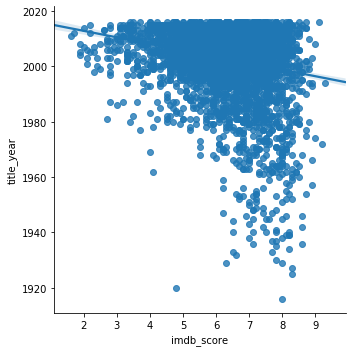

In [38]:
sns.lmplot('imdb_score', 'title_year', data=df, fit_reg=True);

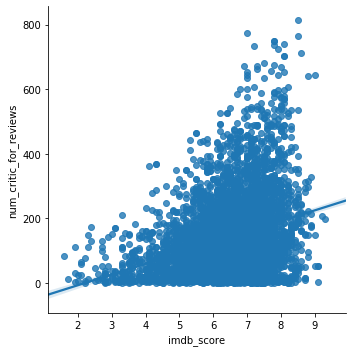

In [39]:
sns.lmplot('imdb_score', 'num_critic_for_reviews', data=df, fit_reg=True);

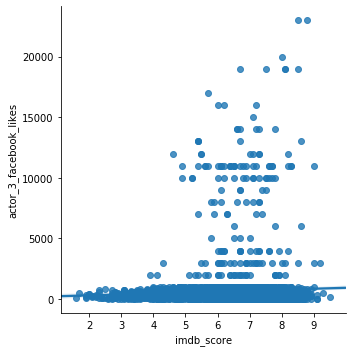

In [40]:
sns.lmplot('imdb_score', 'actor_3_facebook_likes', data=df, fit_reg=True);

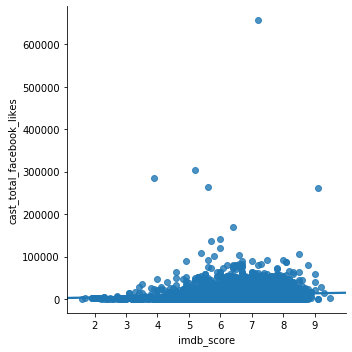

In [41]:
sns.lmplot('imdb_score', 'cast_total_facebook_likes', data=df, fit_reg=True);

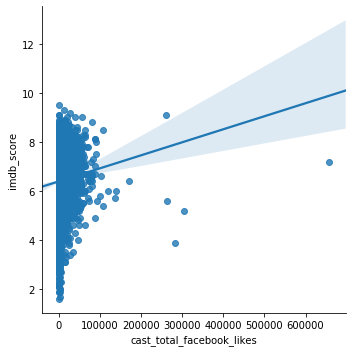

In [42]:
sns.lmplot('cast_total_facebook_likes', 'imdb_score', data=df, fit_reg=True);

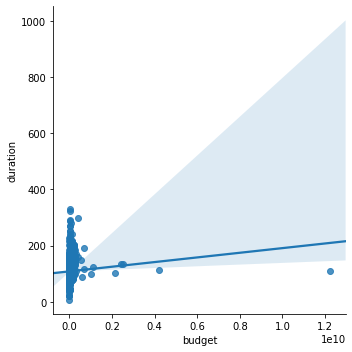

In [43]:
sns.lmplot("budget", "duration", df, x_jitter=.15)

C:\Users\jintaohu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:197: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



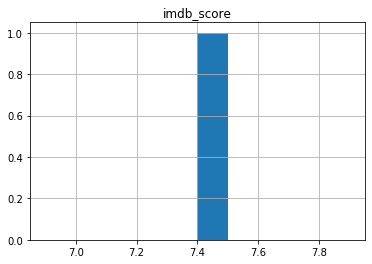

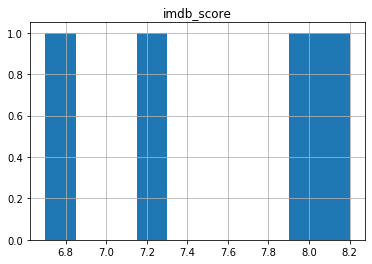

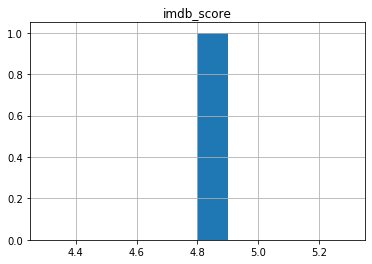

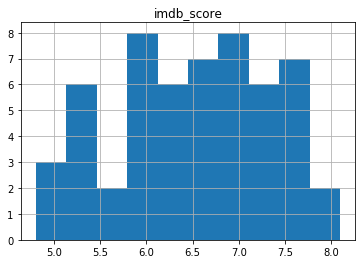

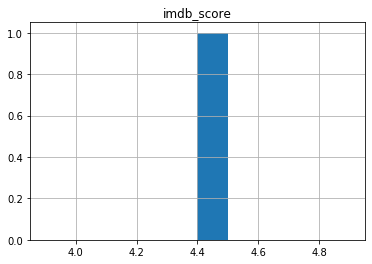

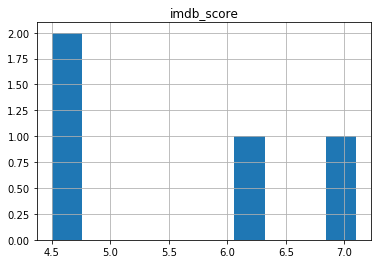

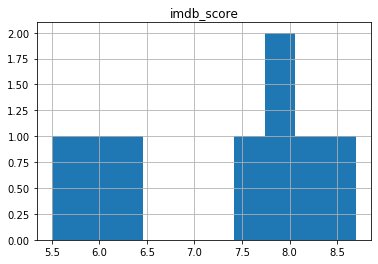

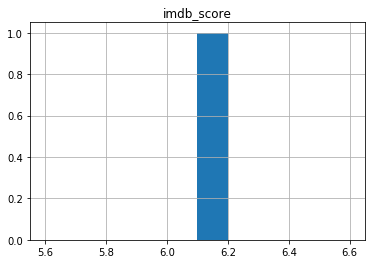

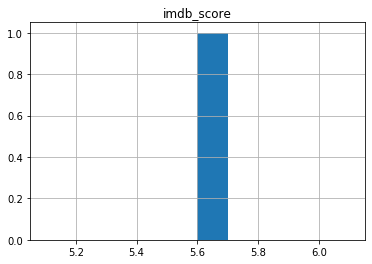

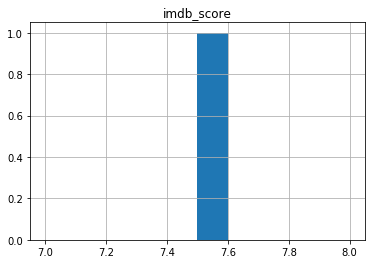

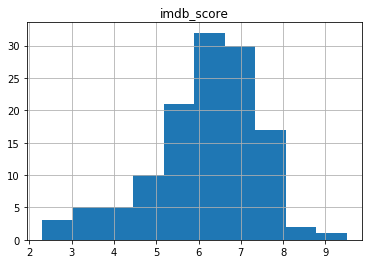

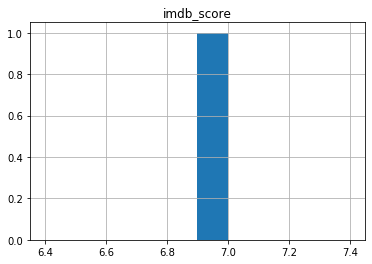

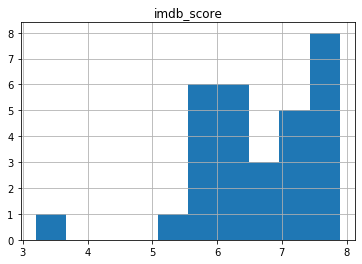

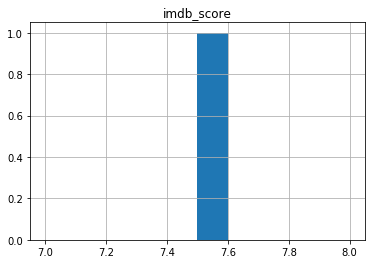

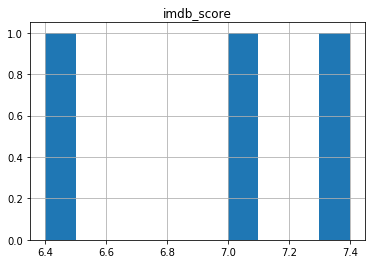

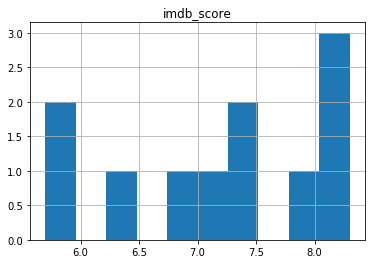

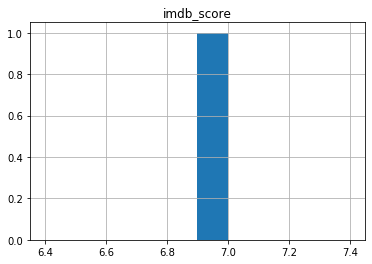

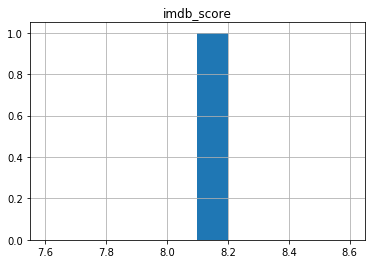

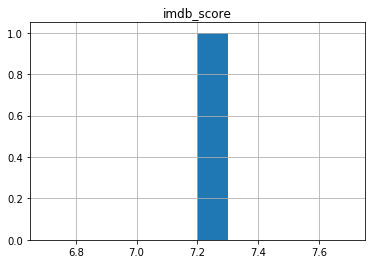

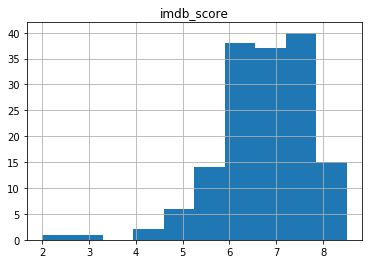

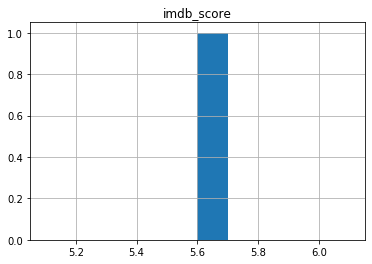

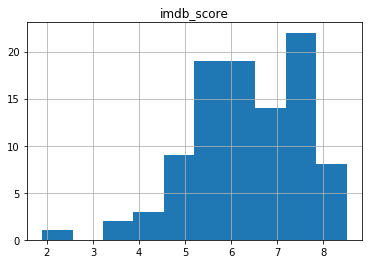

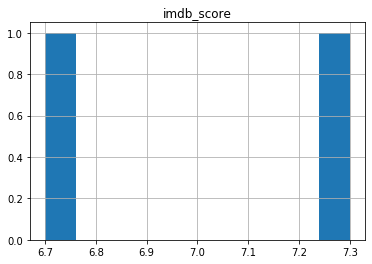

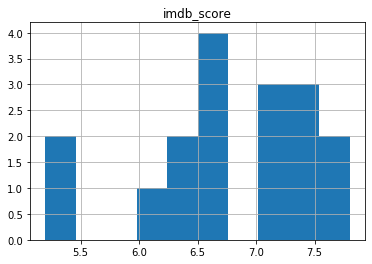

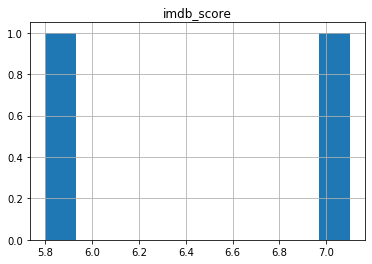

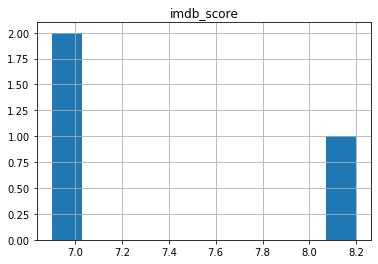

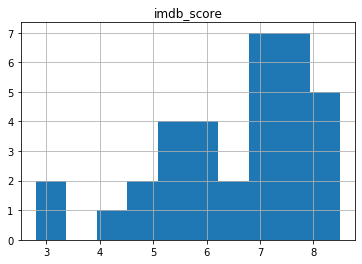

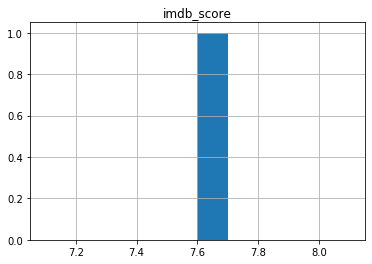

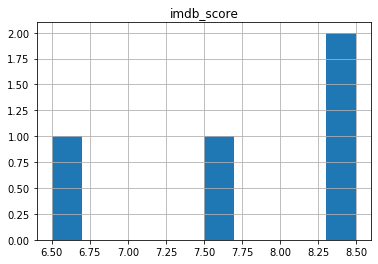

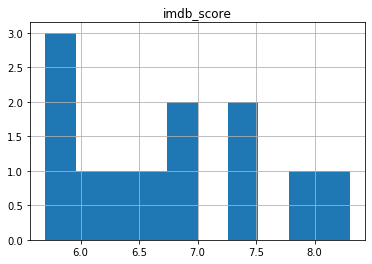

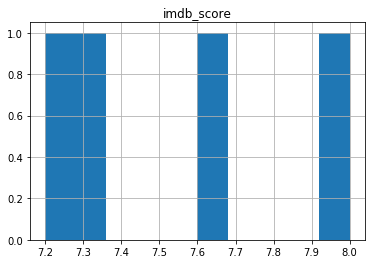

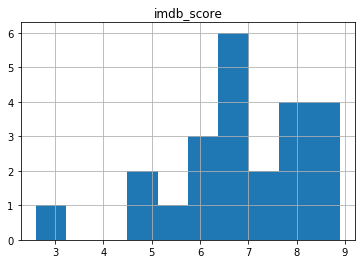

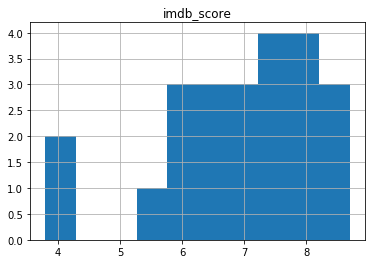

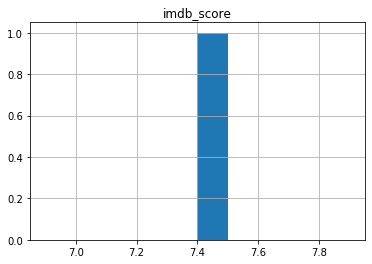

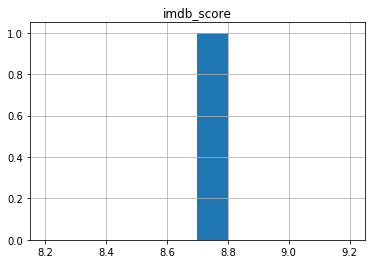

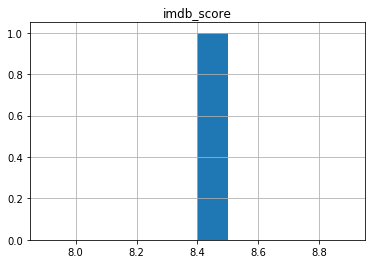

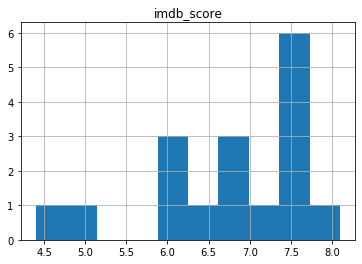

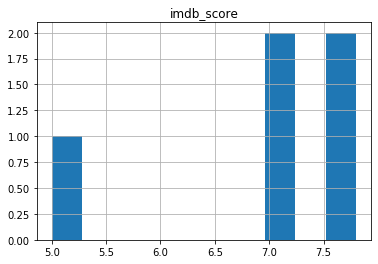

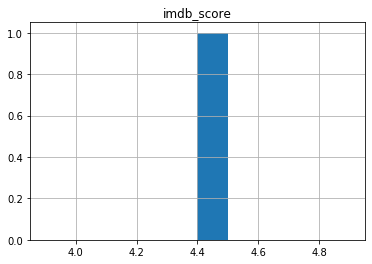

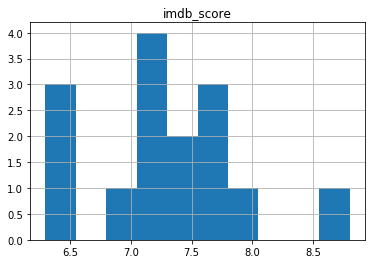

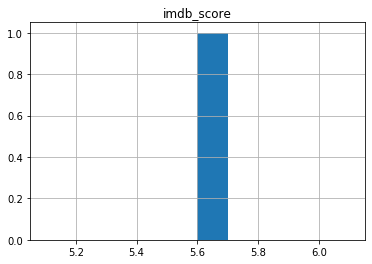

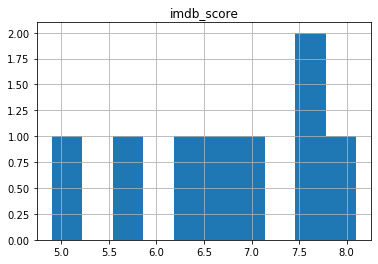

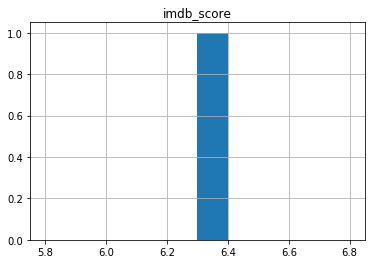

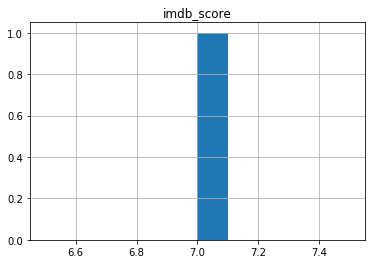

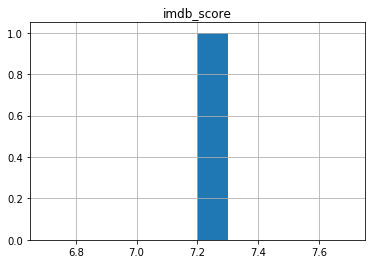

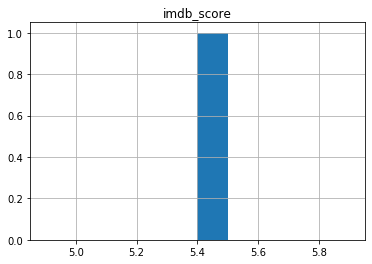

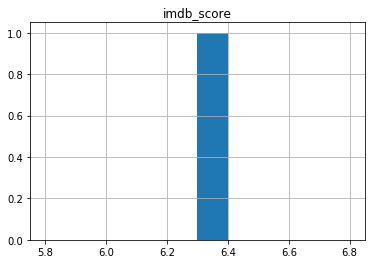

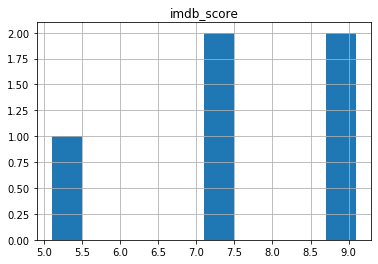

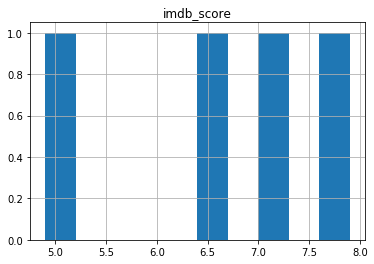

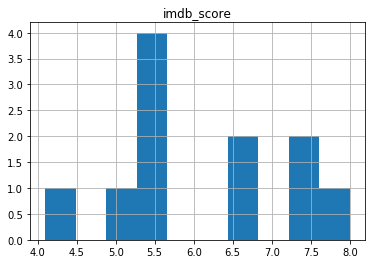

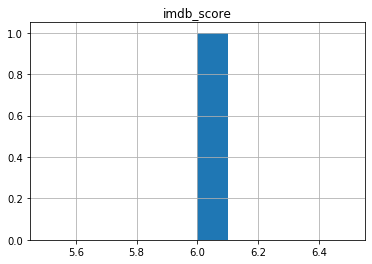

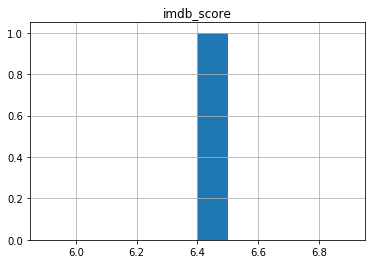

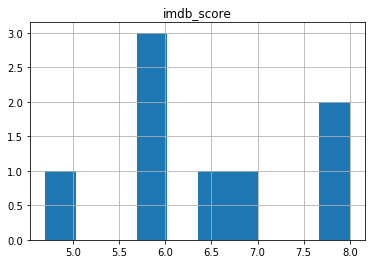

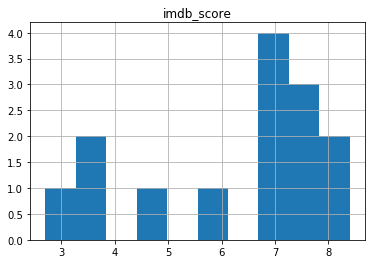

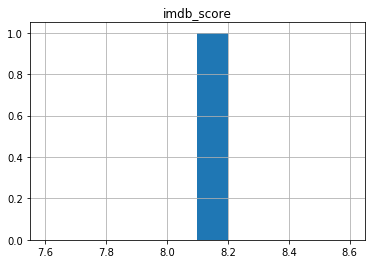

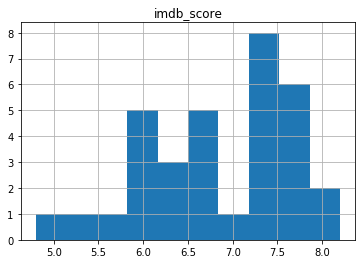

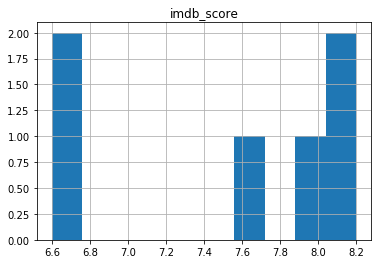

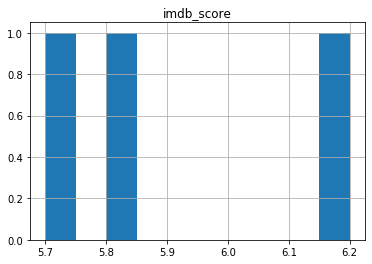

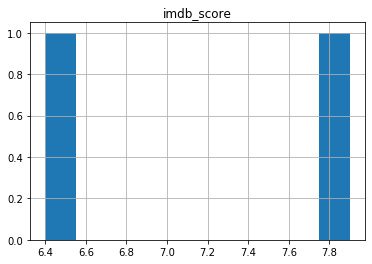

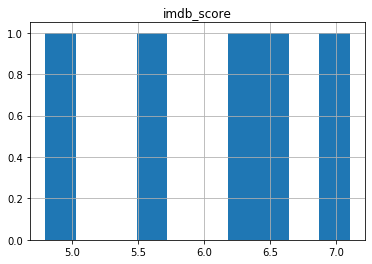

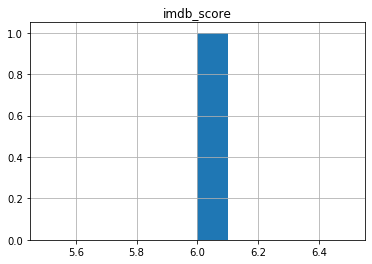

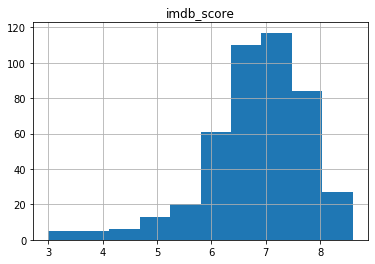

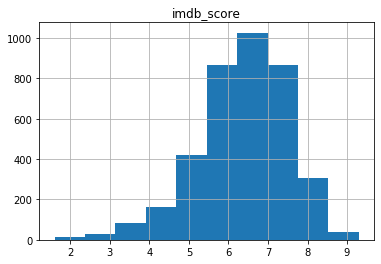

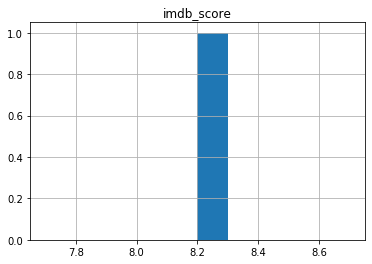

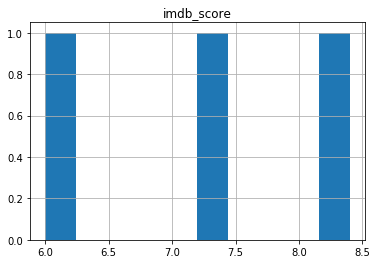

In [44]:
df.groupby('country').hist('imdb_score');

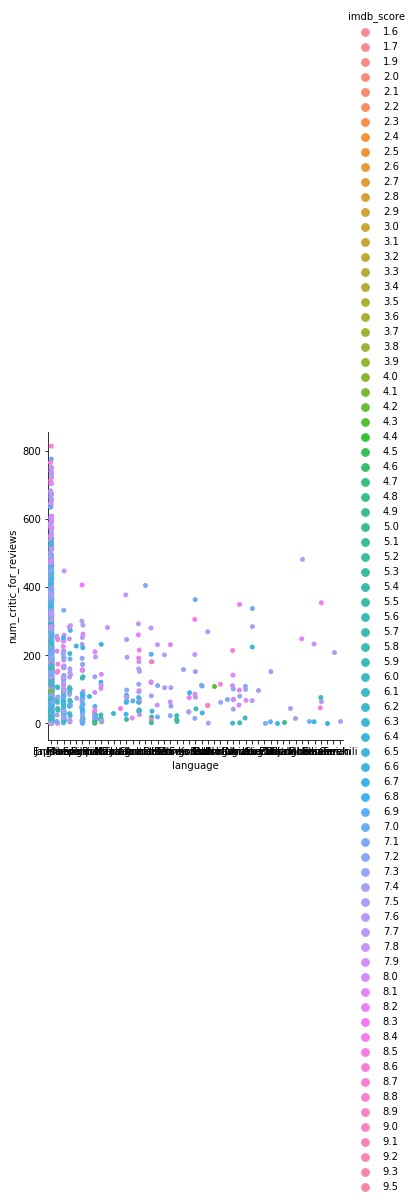

In [45]:
sns.catplot("language", "num_critic_for_reviews", "imdb_score", data=df)

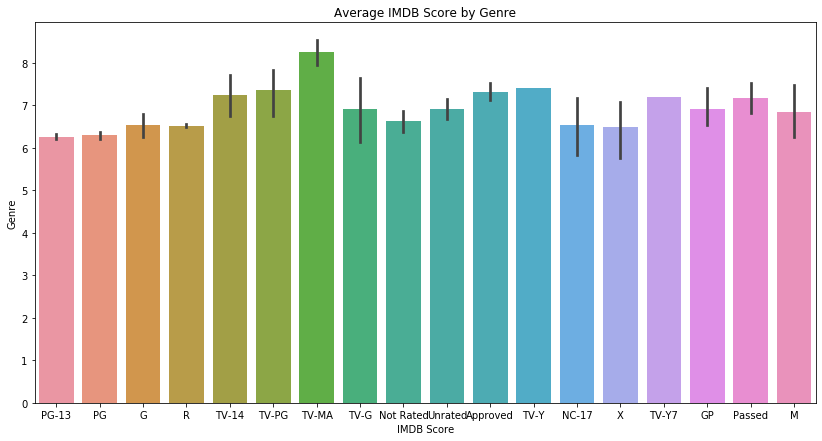

In [46]:
plt.figure(figsize=(14,7))
plt.title("Average IMDB Score by Genre")
sns.barplot(x='content_rating',y='imdb_score',data=df)
plt.xlabel('IMDB Score')
plt.ylabel("Genre");

## 5. Correlation Analysis
This extends the previous section (business intelligence).
    • Perform correlation analysis and discuss the results. Again, what variables are correlated to imdb_score? How are some key variables correlated to each other?
- corr()
- heatmap()
- interpretation

In [47]:
df1.corr()

num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.227619   
duration                                 0.227619  1.000000   
director_facebook_likes                  0.175715  0.180397   
actor_3_facebook_likes                   0.245440  0.120776   
actor_1_facebook_likes                   0.165648  0.082901   
gross                                    0.460797  0.242610   
num_voted_users                          0.591586  0.338953   
cast_total_facebook_likes                0.233781  0.117736   
facenumber_in_poster                    -0.035603  0.027522   
num_user_for_reviews                     0.562596  0.352083   
budget                                   0.103921  0.067380   
title_year                               0.420184 -0.131689   
actor_2_facebook_likes                   0.251119  0.126651   
imdb_score                               0.349825  0.367388   
aspect_ratio                             0.179809  0.153353   
movie_facebook_likes                     0.703579  0.212977   
profit                                   0.037177  0.007119   

                           director_facebook_likes  actor_3_facebook_likes  \
num_critic_for_reviews                    0.175715                0.245440   
duration                                  0.180397                0.120776   
director_facebook_likes                   1.000000                0.120584   
actor_3_facebook_likes                    0.120584                1.000000   
actor_1_facebook_likes                    0.090467                0.252450   
gross                                     0.139729                0.281238   
num_voted_users                           0.302766                0.257632   
cast_total_facebook_likes                 0.120076                0.485596   
facenumber_in_poster                     -0.047577                0.104853   
num_user_for_reviews                      0.218876                0.200485   
budget                                    0.018105                0.038207   
title_year                               -0.045718                0.116479   
actor_2_facebook_likes                    0.117858                0.550328   
imdb_score                                0.193125                0.064187   
aspect_ratio                              0.037171                0.047918   
movie_facebook_likes                      0.162641                0.259922   
profit                                    0.024457                0.047490   

                           actor_1_facebook_likes     gross  num_voted_users  \
num_critic_for_reviews                   0.165648  0.460797         0.591586   
duration                                 0.082901  0.242610         0.338953   
director_facebook_likes                  0.090467  0.139729         0.302766   
actor_3_facebook_likes                   0.252450  0.281238         0.257632   
actor_1_facebook_likes                   1.000000  0.142577         0.178009   
gross                                    0.142577  1.000000         0.622714   
num_voted_users                          0.178009  0.622714         1.000000   
cast_total_facebook_likes                0.946075  0.227955         0.243834   
facenumber_in_poster                     0.055769 -0.034389        -0.035822   
num_user_for_reviews                     0.121393  0.545656         0.779191   
budget                                   0.016027  0.098318         0.065398   
title_year                               0.095997  0.053163         0.023488   
actor_2_facebook_likes                   0.390411  0.243977         0.239126   
imdb_score                               0.092927  0.215510         0.482583   
aspect_ratio                             0.056816  0.065903         0.087079   
movie_facebook_likes                     0.128804  0.358630         0.514855   
profit                                   0.027363  0.205771         0.124032   

                           cast_total_facebook

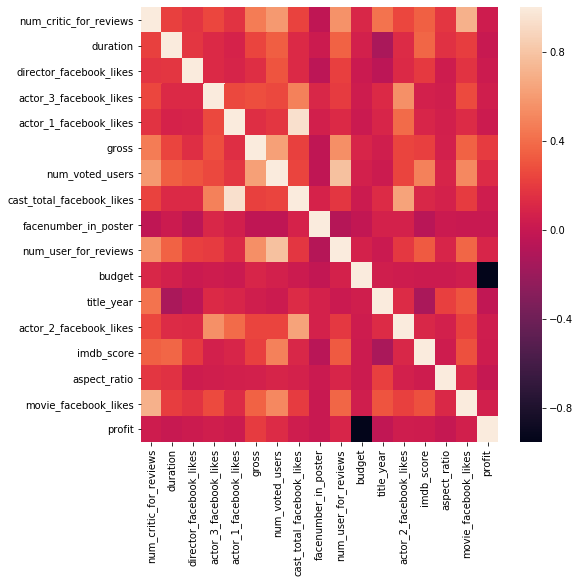

In [48]:
plt.figure(figsize=(8, 8))
sns.heatmap(df1.corr());

The director ,movies' duration, number of critics viewing a movie,to conclude,are critical to the imdb_score.Their correlations are useful to predict the movie to be successful or not.

## 6. Storytelling
At the end, this is what your client is interested in. Develop useful insights from your analysis. Write a summery using bulleted lists and/or numbers in markdown cells. If this section is “too thin”, your project will receive a low grade.

In this project, we developed a mathematical model to predict the success and failure of the upcoming movies based on several attributes.The terminal goal of this project is to find values to help determine box office success of a movie. Basically the movies corpotations have to know how to make more money. This database contains categorical and numerical information such as IMDb score, director, gross, budget and so on and so forth.

The most crucial factors to predict I think are
    
    1.movie release year,recent movies are better,If the movie was to be released on a weekend, it was given higher weight because the chances of success were greater. If with the release of a movie, there was another high success movie released, a lower weight was given to the release time indicating that the chances of movie success were low due to the competition.
    2.movie duration,longer movies are better
    3.profit,High profit movies are better
    4.budget,High budget movies are better, if a movies budget was below 5 million, the budget was given a lower weight
    5.director_name,famous director's movies are better
    6.number of critics reviewing a movie,more number of critics reviewing a movie are better movies
    7.number of users reviewing a movie,more number of users reviewing a movie are better movies
    8.number of users liking a movie,more number of users liking a movie are better movies.

To conclude,the things above are important for company to predict the success of movie,This project also show the power of predictive and prescriptive data analytics for information systems to aid movie business decisions. This model also helps to find out the review of the new movie.User can easily decide whether to book ticket in advance or not.

Big data forecasting is the core application of big data, and big data forecasting extends the traditional meaning forecast to “current measurement.” The advantage of big data forecasting is that it transforms a very difficult forecasting problem into a relatively simple description problem. This is something that traditional small data sets can't match. From the perspective of forecasting, the results of big data forecasting are not only simple and objective conclusions for dealing with real business, but also can be used to help business management decisions. Data can also be planned to guide the development of greater consumer power

# Final Project

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# model validation
from sklearn.model_selection import train_test_split

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE


import statsmodels.api as sm
from statsmodels.formula.api import ols

In [50]:
# install yellowbrick

!pip install yellowbrick

In [51]:
movievalues = pd.read_csv("movie_metadata.csv")
movievalues.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [52]:
len(movievalues)

5043

In [53]:
movievalues1 = movievalues [['movie_title' ,'director_name','num_critic_for_reviews' , 'duration' ,  'actor_1_facebook_likes' , 'gross', 'budget' ,'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes']]

In [54]:
movievalues1 = movievalues.dropna()
len(movievalues1)

3756

In [55]:
# Identify data quality issues
movievalues1.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [56]:
# Identify data types
movievalues1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

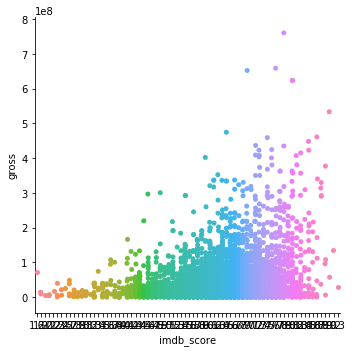

In [57]:
sns.catplot('imdb_score', 'gross', data=movievalues1)

In [58]:
# correlation
movievalues1.corr()

num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.228631   
duration                                 0.228631  1.000000   
director_facebook_likes                  0.175128  0.180644   
actor_3_facebook_likes                   0.252782  0.125797   
actor_1_facebook_likes                   0.165986  0.083632   
gross                                    0.464187  0.245726   
num_voted_users                          0.592473  0.339592   
cast_total_facebook_likes                0.236533  0.120179   
facenumber_in_poster                    -0.034365  0.026919   
num_user_for_reviews                     0.563684  0.351595   
budget                                   0.104717  0.068012   
title_year                               0.420202 -0.130211   
actor_2_facebook_likes                   0.253125  0.128935   
imdb_score                               0.347886  0.366221   
aspect_ratio                             0.180230  0.153027   
movie_facebook_likes                     0.705226  0.215303   

                           director_facebook_likes  actor_3_facebook_likes  \
num_critic_for_reviews                    0.175128                0.252782   
duration                                  0.180644                0.125797   
director_facebook_likes                   1.000000                0.117405   
actor_3_facebook_likes                    0.117405                1.000000   
actor_1_facebook_likes                    0.089630                0.252408   
gross                                     0.138351                0.299864   
num_voted_users                           0.299624                0.267762   
cast_total_facebook_likes                 0.118547                0.489795   
facenumber_in_poster                     -0.048067                0.106189   
num_user_for_reviews                      0.217103                0.205343   
budget                                    0.018167                0.039966   
title_year                               -0.044656                0.117475   
actor_2_facebook_likes                    0.116058                0.553755   
imdb_score                                0.192314                0.065544   
aspect_ratio                              0.037528                0.046356   
movie_facebook_likes                      0.161962                0.271508   

                           actor_1_facebook_likes     gross  num_voted_users  \
num_critic_for_reviews                   0.165986  0.464187         0.592473   
duration                                 0.083632  0.245726         0.339592   
director_facebook_likes                  0.089630  0.138351         0.299624   
actor_3_facebook_likes                   0.252408  0.299864         0.267762   
actor_1_facebook_likes                   1.000000  0.144010         0.179590   
gross                                    0.144010  1.000000         0.624949   
num_voted_users                          0.179590  0.624949         1.000000   
cast_total_facebook_likes                0.944813  0.235601         0.249119   
facenumber_in_poster                     0.057387 -0.032025        -0.032209   
num_user_for_reviews                     0.121935  0.544674         0.778881   
budget                                   0.016418  0.099496         0.065927   
title_year                               0.096194  0.054808         0.023687   
actor_2_facebook_likes                   0.391166  0.252842         0.244822   
imdb_score                               0.093597  0.214740         0.482430   
aspect_ratio                             0.056946  0.063946         0.084626   
movie_facebook_likes                     0.130300  0.366933         0.517751   

                           cast_total_facebook_likes  facenumber_in_poster  \
num_critic_for_reviews                      0.236533             -0.034365   
duration                                    0.120179              0.026919   
director_facebook_likes          

In [59]:
movievalues1['content_rating'].unique()

array(['PG-13', 'PG', 'G', 'R', 'Approved', 'NC-17', 'X', 'Not Rated',
       'Unrated', 'M', 'GP', 'Passed'], dtype=object)

In [60]:
movievalues1 =  pd.get_dummies(movievalues1, columns=["content_rating"])
movievalues1.head(2)

color   director_name  num_critic_for_reviews  duration  \
0  Color   James Cameron                   723.0     178.0   
1  Color  Gore Verbinski                   302.0     169.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   

  content_rating_GP content_rating_M  content_rating_NC-17  \
0                 0                0                     0   
1                 0                0                     0   

   content_rating_Not Rated content_rating_PG  content_rating_PG-13  \
0                         0                 0                     1   
1                         0                 0                     1   

  content_rating_Passed content_rating_R  content_rating_Unrated  \
0                     0                0                       0   
1                     0                0                       0   

  content_rating_X  
0                0  
1                0  

[2 rows x 39 columns]

In [61]:
#assigning columns to X and Y variables
y = movievalues1['imdb_score'] 
X = movievalues1.drop(['color','imdb_score','director_name','actor_2_name','actor_1_name','movie_title','genres','actor_3_name','plot_keywords','country','language', 'movie_imdb_link','title_year','aspect_ratio'], axis =1)

Dropped all categorical variables

In [62]:
X.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
       'movie_facebook_likes', 'content_rating_Approved', 'content_rating_G',
       'content_rating_GP', 'content_rating_M', 'content_rating_NC-17',
       'content_rating_Not Rated', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_Passed', 'content_rating_R', 'content_rating_Unrated',
       'content_rating_X'],
      dtype='object')

## Learn Multiple Regression

In [63]:
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [64]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.710052132828995
variance or r-squared:  0.36338758408977034


In [65]:
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_))))

0             1
0      num_critic_for_reviews  1.549392e-03
1                    duration  1.184762e-02
2     director_facebook_likes  7.441049e-06
3      actor_3_facebook_likes  7.196557e-05
4      actor_1_facebook_likes  7.144058e-05
5                       gross -1.132368e-09
6             num_voted_users  3.806771e-06
7   cast_total_facebook_likes -7.029024e-05
8        facenumber_in_poster -2.605000e-02
9        num_user_for_reviews -5.418807e-04
10                     budget -4.109748e-11
11     actor_2_facebook_likes  7.226287e-05
12       movie_facebook_likes -2.365252e-06
13    content_rating_Approved  4.777820e-01
14           content_rating_G -1.933774e-01
15          content_rating_GP -1.417353e-01
16           content_rating_M  4.526420e-01
17       content_rating_NC-17 -3.398803e-01
18   content_rating_Not Rated  2.458942e-01
19          content_rating_PG -3.922487e-01
20       content_rating_PG-13 -6.125323e-01
21      content_rating_Passed  4.268470e-01
22           content_rating_R -2.628933e-01
23     content_rating_Unrated  3.202438e-01
24           content_rating_X  1.925841e-02

In [66]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.002'),
 ('duration', '0.012'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.026'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('content_rating_Approved', '0.478'),
 ('content_rating_G', '-0.193'),
 ('content_rating_GP', '-0.142'),
 ('content_rating_M', '0.453'),
 ('content_rating_NC-17', '-0.340'),
 ('content_rating_Not Rated', '0.246'),
 ('content_rating_PG', '-0.392'),
 ('content_rating_PG-13', '-0.613'),
 ('content_rating_Passed', '0.427'),
 ('content_rating_R', '-0.263'),
 ('content_rating_Unrated', '0.320'),
 ('content_rating_X', '0.019')]

    Multiple Regression
    R Score: .363
    Most Important Feature: content_rating_Approved

## SKL Learn Multiple Regression

In [67]:
#create two datasets from the origianl

# train data

# test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
print (len(movievalues1), len(X),len(y))

3756 3756 3756


In [69]:
print (len(X_train), len(y_train), len(X_test),len(y_test))

2629 2629 1127 1127


In [70]:
model1 = lm.LinearRegression()

model1.fit(X_train, y_train)   
#built 

pred_y = model1.predict(X_test)

In [71]:
print("mean square error: ", mean_squared_error(y_test, pred_y))
print("variance or r-squared: ", explained_variance_score(y_test, pred_y))

mean square error:  0.766331597386859
variance or r-squared:  0.3365492722259066


    Regression, SKL Learn
    R Score: .336

## Regression Lasso

In [72]:
# Fit the model below

model1 = lm.Lasso(alpha=0.1)             #higher alpha (penality parameter), fewer predictors
model1.fit(X, y)
model1_y = model1.predict(X)

C:\Users\jintaohu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1410.5050272195087, tolerance: 0.41892928008519703



In [73]:
model1

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [74]:
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 1.55621501e-03  1.16586761e-02  7.52323742e-06  7.05519587e-05
  7.46329474e-05 -1.79263088e-09  4.02986911e-06 -7.42003330e-05
 -6.56865087e-03 -5.57054039e-04 -5.56887310e-11  7.66428665e-05
 -2.83983291e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
y-intercept  4.874381473837325


In [75]:
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_))))

0             1
0      num_critic_for_reviews  1.556215e-03
1                    duration  1.165868e-02
2     director_facebook_likes  7.523237e-06
3      actor_3_facebook_likes  7.055196e-05
4      actor_1_facebook_likes  7.463295e-05
5                       gross -1.792631e-09
6             num_voted_users  4.029869e-06
7   cast_total_facebook_likes -7.420033e-05
8        facenumber_in_poster -6.568651e-03
9        num_user_for_reviews -5.570540e-04
10                     budget -5.568873e-11
11     actor_2_facebook_likes  7.664287e-05
12       movie_facebook_likes -2.839833e-06
13    content_rating_Approved  0.000000e+00
14           content_rating_G  0.000000e+00
15          content_rating_GP  0.000000e+00
16           content_rating_M  0.000000e+00
17       content_rating_NC-17  0.000000e+00
18   content_rating_Not Rated  0.000000e+00
19          content_rating_PG  0.000000e+00
20       content_rating_PG-13 -0.000000e+00
21      content_rating_Passed  0.000000e+00
22           content_rating_R  0.000000e+00
23     content_rating_Unrated  0.000000e+00
24           content_rating_X  0.000000e+00

In [76]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.002'),
 ('duration', '0.012'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.007'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('content_rating_Approved', '0.000'),
 ('content_rating_G', '0.000'),
 ('content_rating_GP', '0.000'),
 ('content_rating_M', '0.000'),
 ('content_rating_NC-17', '0.000'),
 ('content_rating_Not Rated', '0.000'),
 ('content_rating_PG', '0.000'),
 ('content_rating_PG-13', '-0.000'),
 ('content_rating_Passed', '0.000'),
 ('content_rating_R', '0.000'),
 ('content_rating_Unrated', '0.000'),
 ('content_rating_X', '0.000')]

In [77]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7470273787436394
variance or r-squared:  0.3302366370785802


    Lasso Regression
    R Score: .363
    Most Important Feature: number of critics reviews

## Regression Ridge

In [78]:
model2 = linear_model.Ridge()            #higher alpha (penality parameter), fewer predictors
model2.fit(X, y)
model2_y = model2.predict(X)

C:\Users\jintaohu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=5.0564e-21): result may not be accurate.



In [79]:
print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.7100850852937157
variance or r-squared:  0.36335803985321913


    Ridge Regression
    R Score: .363

## Feature Selection¶
    2 variables

In [80]:
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)

In [81]:
selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[1 6]


In [82]:
X.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   
1                   302.0     169.0                    563.0   
2                   602.0     148.0                      0.0   
3                   813.0     164.0                  22000.0   
5                   462.0     132.0                    475.0   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   
2                   161.0                 11000.0  200074175.0   
3                 23000.0                 27000.0  448130642.0   
5                   530.0                   640.0   73058679.0   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                       4834                   0.0   
1           471220                      48350                   0.0   
2           275868                      11700                   1.0   
3          1144337                     106759                   0.0   
5           212204                       1873                   1.0   

   num_user_for_reviews  ...  content_rating_GP  content_rating_M  \
0                3054.0  ...                  0                 0   
1                1238.0  ...                  0                 0   
2                 994.0  ...                  0                 0   
3                2701.0  ...                  0                 0   
5                 738.0  ...                  0                 0   

   content_rating_NC-17  content_rating_Not Rated  content_rating_PG  \
0                     0                         0                  0   
1                     0                         0                  0   
2                     0                         0                  0   
3                     0                         0                  0   
5                     0                         0                  0   

   content_rating_PG-13  content_rating_Passed  content_rating_R  \
0                     1                      0                 0   
1                     1                      0                 0   
2                     1                      0                 0   
3                     1                      0                 0   
5                     1                      0                 0   

   content_rating_Unrated  content_rating_X  
0                       0                 0  
1                       0                 0  
2                       0                 0  
3                       0                 0  
5                       0                 0  

[5 rows x 25 columns]

In [83]:
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.804129664671588
variance or r-squared:  0.2790403621603512


    Multiple Regression Two Variables
    R Score: .279

## Feature Selection¶
    3 variables

In [84]:
X_new = SelectKBest(f_regression, k=3).fit_transform(X, y)

In [85]:
model3 = lm.LinearRegression()
model3.fit(X_new, y)
model3_y = model3.predict(X_new)

print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))

mean square error:  0.7987745639710209
variance or r-squared:  0.28384159215010973


    Multiple Regression Three Variables
    R Score: .283

## RandormForestRegressor

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

mean square error:  0.06782058439829611
variance or r-squared:  0.9392668126572632


In [87]:
sorted(zip(regr.feature_importances_, X.columns))

[(1.3378779380844574e-05, 'content_rating_Passed'),
 (1.7552275721884876e-05, 'content_rating_GP'),
 (7.009715189518393e-05, 'content_rating_X'),
 (8.024982093508026e-05, 'content_rating_Approved'),
 (8.721073225719302e-05, 'content_rating_M'),
 (0.000100843378757299, 'content_rating_Unrated'),
 (0.0002826448032982341, 'content_rating_Not Rated'),
 (0.0005070322954152537, 'content_rating_NC-17'),
 (0.003894669661126573, 'content_rating_G'),
 (0.004142659004111264, 'content_rating_PG'),
 (0.00601563800142753, 'content_rating_R'),
 (0.012154414880812127, 'content_rating_PG-13'),
 (0.01854883265634396, 'facenumber_in_poster'),
 (0.024508612293358167, 'actor_1_facebook_likes'),
 (0.02919977307317548, 'movie_facebook_likes'),
 (0.029570221901739413, 'actor_2_facebook_likes'),
 (0.030908714462598054, 'cast_total_facebook_likes'),
 (0.036265503638620494, 'director_facebook_likes'),
 (0.03794394517469092, 'actor_3_facebook_likes'),
 (0.049324435956810325, 'num_critic_for_reviews'),
 (0.0713660

    Random Forest Regressor
    R Score: .939
    Most Important Feature: number of voted users/duration/budget

## RandormForestRegressor Limited Selection¶

In [88]:
y = movievalues1['imdb_score'] 
#X = teams[['lstat', 'ptratio', 'indus']]
X = movievalues1[['num_voted_users','duration','budget','num_user_for_reviews','gross']]


regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

mean square error:  0.07496056469648568
variance or r-squared:  0.9328421190849071


In [89]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.12599550502989604, 'num_user_for_reviews'),
 (0.13799090019260457, 'gross'),
 (0.16457556153493283, 'duration'),
 (0.16778680495340073, 'budget'),
 (0.40365122828916583, 'num_voted_users')]

    Ramdom Forest 5 Variables
    R Score: .9328
    Most Important Feature: number of voted users/duration/budget

# Classification

In [90]:
# import packages
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import chi2

# scikitplot for confusion matrix
import scikitplot as skplt

In [91]:
# Create a function to categorize IMDB scores
# The four categories are: <4, 4~6, 6~8 and 8~10, which represents bad, OK, good and excellent respectively

def func(x):
    if 8 <= x <= 10: return 'excellent'
    elif 6 <= x < 8: return 'good'
    elif 4 <= x < 6: return 'OK'
    else: return 'bad'

# create imdb_cat category column
df1['imdb_category'] = df['imdb_score'].apply(func)

# then drop imdb_score
df2 = df1.drop(['imdb_score'], axis=1)
df2.head()

director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
5     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
5                   640.0   73058679.0          Action|Adventure|Sci-Fi   

      actor_1_name  ... language  country  content_rating       budget  \
0      CCH Pounder  ...  English      USA           PG-13  237000000.0   
1      Johnny Depp  ...  English      USA           PG-13  300000000.0   
2  Christoph Waltz  ...  English       UK           PG-13  245000000.0   
3        Tom Hardy  ...  English      USA           PG-13  250000000.0   
5     Daryl Sabara  ...  English      USA           PG-13  263700000.0   

   title_year actor_2_facebook_likes aspect_ratio  movie_facebook_likes  \
0      2009.0                  936.0         1.78                 33000   
1      2007.0                 5000.0         2.35                     0   
2      2015.0                  393.0         2.35                 85000   
3      2012.0                23000.0         2.35                164000   
5      2012.0                  632.0         2.35                 24000   

        profit imdb_category  
0  523505847.0          good  
1    9404152.0          good  
2  -44925825.0          good  
3  198130642.0     excellent  
5 -190641321.0          good  

[5 rows x 28 columns]

In [92]:
# assign columns to X and Y variables
y = df2['imdb_category'] 
X = df2.drop(['imdb_category','content_rating','director_name','actor_2_name','actor_1_name','movie_title','genres','actor_3_name','plot_keywords','country','language', 'movie_imdb_link','title_year','aspect_ratio'],axis =1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
X.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
       'movie_facebook_likes', 'profit'],
      dtype='object')

## Decision tree - full model

In [94]:
# build model
# Initialize DecisionTreeClassifier() 
dt = DecisionTreeClassifier()
# Train a decision tree model
dt = dt.fit(X_train, y_train)

# model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))

0.6830796777081468
--------------------------------------------------------
[[147  11   2 118]
 [ 11   7   1   6]
 [  0   0  32  24]
 [139   7  35 577]]
--------------------------------------------------------
              precision    recall  f1-score   support

          OK       0.49      0.53      0.51       278
         bad       0.28      0.28      0.28        25
   excellent       0.46      0.57      0.51        56
        good       0.80      0.76      0.78       758

    accuracy                           0.68      1117
   macro avg       0.51      0.54      0.52      1117
weighted avg       0.69      0.68      0.69      1117



68.66% accuracy

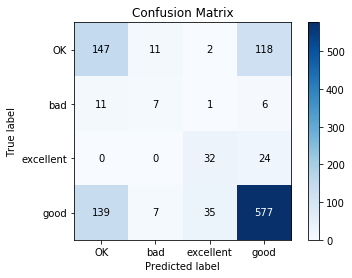

In [95]:
# show confusion matrix
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

In [96]:
# remove highly correlated variables: cast_total_facebook_likes, num_user_for_reviews and profit
df1 = df.drop(['cast_total_facebook_likes'], axis=1)

df1 = df1.drop(['num_user_for_reviews'], axis=1)

In [97]:
# Dirctor names, actor names and movie titles are too different to be used for predicting IMDB scores, 
# we will remove them before data modeling

df1 = df1.drop(['director_name'], axis=1)
df1 = df1.drop(['actor_1_name'], axis=1)
df1 = df1.drop(['actor_2_name'], axis=1)
df1 = df1.drop(['actor_3_name'], axis=1)
df1 = df1.drop(['movie_title'], axis=1)
df1 = df1.drop(['color'], axis=1)

In [98]:
df1= df1.dropna()
len(df1)

3757

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3757 entries, 0 to 5042
Data columns (total 20 columns):
num_critic_for_reviews     3757 non-null float64
duration                   3757 non-null float64
director_facebook_likes    3757 non-null float64
actor_3_facebook_likes     3757 non-null float64
actor_1_facebook_likes     3757 non-null float64
gross                      3757 non-null float64
genres                     3757 non-null object
num_voted_users            3757 non-null int64
facenumber_in_poster       3757 non-null float64
plot_keywords              3757 non-null object
movie_imdb_link            3757 non-null object
language                   3757 non-null object
country                    3757 non-null object
content_rating             3757 non-null object
budget                     3757 non-null float64
title_year                 3757 non-null float64
actor_2_facebook_likes     3757 non-null float64
imdb_score                 3757 non-null float64
aspect_ratio       

# Decision tree with 10-fold cross validation

In [100]:
# initialize decision tree algorithm (without fitting)
scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.56417112 0.54010695 0.64343164 0.64516129 0.68548387 0.62903226
 0.63978495 0.60752688 0.59838275 0.61455526]
0.6167636962957713


In [101]:
# https://scikit-learn.org/stable/modules/cross_validation.html
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.62 (+/- 0.08)


## KNN

In [102]:
y = df2['imdb_category'] 
X = df2.drop(['imdb_category','content_rating','director_name','actor_2_name','actor_1_name','movie_title','genres','actor_3_name','plot_keywords','country','language', 'movie_imdb_link','title_year','aspect_ratio'],axis =1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# find the best N
for i in range(1, 16):
    # build model
    knn = KNeighborsClassifier(n_neighbors=i)  # default n_neighbors=5
    # Train a decision tree model
    knn = knn.fit(X_train, y_train)
    # model evaluation
    print("N =", i, "Accuracy =", metrics.accuracy_score(y_test, knn.predict(X_test)))

N = 1 Accuracy = 0.5613249776186213
N = 2 Accuracy = 0.4717994628469114
N = 3 Accuracy = 0.6007162041181737
N = 4 Accuracy = 0.5899731423455685
N = 5 Accuracy = 0.639212175470009
N = 6 Accuracy = 0.6114592658907789
N = 7 Accuracy = 0.64816472694718
N = 8 Accuracy = 0.64816472694718
N = 9 Accuracy = 0.6624888093106536
N = 10 Accuracy = 0.639212175470009
N = 11 Accuracy = 0.6615935541629364
N = 12 Accuracy = 0.6535362578334826
N = 13 Accuracy = 0.6705461056401074
N = 14 Accuracy = 0.666069829901522
N = 15 Accuracy = 0.6723366159355416


The best N is 15 which enabled the model to generate the highest accurancy rate 67.2%.

In [103]:
# build model
knn = KNeighborsClassifier(n_neighbors=6)  # default n_neighbors=5
# Train a decision tree model
knn = knn.fit(X_train, y_train)
# model evaluation
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.6114592658907789
--------------------------------------------------------
[[ 81   0   4 193]
 [  8   0   0  17]
 [  3   0   4  49]
 [152   0   8 598]]
--------------------------------------------------------
              precision    recall  f1-score   support

          OK       0.33      0.29      0.31       278
         bad       0.00      0.00      0.00        25
   excellent       0.25      0.07      0.11        56
        good       0.70      0.79      0.74       758

    accuracy                           0.61      1117
   macro avg       0.32      0.29      0.29      1117
weighted avg       0.57      0.61      0.59      1117



C:\Users\jintaohu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



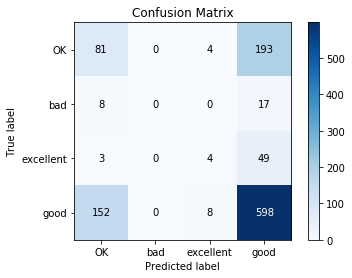

In [104]:

# Show confusion matrix
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=knn.predict(X_test))
plt.show()

## Logistic regression

In [105]:
# build model
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

# evaluate model
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, lr.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, lr.predict(X_test)))
print("--------------------------------------------------------")

C:\Users\jintaohu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\jintaohu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



0.6526410026857654
--------------------------------------------------------
[[  5   0   0 273]
 [  0   0   0  25]
 [  0   0  25  31]
 [  3   0  56 699]]
--------------------------------------------------------
              precision    recall  f1-score   support

          OK       0.62      0.02      0.03       278
         bad       0.00      0.00      0.00        25
   excellent       0.31      0.45      0.36        56
        good       0.68      0.92      0.78       758

    accuracy                           0.65      1117
   macro avg       0.40      0.35      0.30      1117
weighted avg       0.63      0.65      0.56      1117

--------------------------------------------------------


65.2% accuracy

## Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier

# build 20 decision trees
clf = RandomForestClassifier(n_estimators=20)   
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# evluate model
print(metrics.accuracy_score(y_test, clf.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, clf.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.7663384064458371
--------------------------------------------------------
[[138   1   0 139]
 [ 10   0   0  15]
 [  0   0  28  28]
 [ 60   0   8 690]]
--------------------------------------------------------
              precision    recall  f1-score   support

          OK       0.66      0.50      0.57       278
         bad       0.00      0.00      0.00        25
   excellent       0.78      0.50      0.61        56
        good       0.79      0.91      0.85       758

    accuracy                           0.77      1117
   macro avg       0.56      0.48      0.51      1117
weighted avg       0.74      0.77      0.75      1117



75.0% accuracy

In [107]:
# show important features
fi=pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})
fi.sort_values('importance', ascending=False).head()

feature  importance
6         num_voted_users    0.136493
1                duration    0.110407
9    num_user_for_reviews    0.083024
5                   gross    0.081494
0  num_critic_for_reviews    0.080062

    The most important variables respectively are num_voted_users, duration, num_user_for_reviews, budget and num_critic_for_reviews.

# Clustering

In [108]:
# import packages
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3757 entries, 0 to 5042
Data columns (total 20 columns):
num_critic_for_reviews     3757 non-null float64
duration                   3757 non-null float64
director_facebook_likes    3757 non-null float64
actor_3_facebook_likes     3757 non-null float64
actor_1_facebook_likes     3757 non-null float64
gross                      3757 non-null float64
genres                     3757 non-null object
num_voted_users            3757 non-null int64
facenumber_in_poster       3757 non-null float64
plot_keywords              3757 non-null object
movie_imdb_link            3757 non-null object
language                   3757 non-null object
country                    3757 non-null object
content_rating             3757 non-null object
budget                     3757 non-null float64
title_year                 3757 non-null float64
actor_2_facebook_likes     3757 non-null float64
imdb_score                 3757 non-null float64
aspect_ratio       

In [110]:
df3 = df1.drop(['genres','plot_keywords','movie_imdb_link','language','country','content_rating'  ], axis=1)
df3.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   
1                   302.0     169.0                    563.0   
2                   602.0     148.0                      0.0   
3                   813.0     164.0                  22000.0   
5                   462.0     132.0                    475.0   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   
2                   161.0                 11000.0  200074175.0   
3                 23000.0                 27000.0  448130642.0   
5                   530.0                   640.0   73058679.0   

   num_voted_users  facenumber_in_poster       budget  title_year  \
0           886204                   0.0  237000000.0      2009.0   
1           471220                   0.0  300000000.0      2007.0   
2           275868                   1.0  245000000.0      2015.0   
3          1144337                   0.0  250000000.0      2012.0   
5           212204                   1.0  263700000.0      2012.0   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   936.0         7.9          1.78                 33000  
1                  5000.0         7.1          2.35                     0  
2                   393.0         6.8          2.35                 85000  
3                 23000.0         8.5          2.35                164000  
5                   632.0         6.6          2.35                 24000

In [111]:
df3 = df3.dropna()
df3.isnull().sum()

num_critic_for_reviews     0
duration                   0
director_facebook_likes    0
actor_3_facebook_likes     0
actor_1_facebook_likes     0
gross                      0
num_voted_users            0
facenumber_in_poster       0
budget                     0
title_year                 0
actor_2_facebook_likes     0
imdb_score                 0
aspect_ratio               0
movie_facebook_likes       0
dtype: int64

In [112]:
len(df3)

3757

In [113]:
# normalize data and save as X
X = (df3 - df3.mean()) / (df3.max() - df3.min())
X.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                0.685143  0.231207                -0.035093   
1                0.166031  0.200490                -0.010615   
2                0.535945  0.128818                -0.035093   
3                0.796118  0.183426                 0.921429   
5                0.363319  0.074211                -0.014441   

   actor_3_facebook_likes  actor_1_facebook_likes     gross  num_voted_users  \
0                0.003644               -0.010546  0.930837         0.461867   
1                0.009948                0.050391  0.337677         0.216267   
2               -0.026530                0.005079  0.193917         0.100652   
3                0.966470                0.030079  0.520090         0.614638   
5               -0.010487               -0.011109  0.026902         0.062974   

   facenumber_in_poster    budget  title_year  actor_2_facebook_likes  \
0             -0.032021  0.015617    0.067655               -0.007923   
1             -0.032021  0.020775    0.045183                0.021742   
2             -0.008765  0.016272    0.135071               -0.011886   
3             -0.032021  0.016682    0.101363                0.153128   
5             -0.008765  0.017803    0.101363               -0.010142   

   imdb_score  aspect_ratio  movie_facebook_likes  
0    0.186340     -0.022340              0.067761  
1    0.082444      0.016122             -0.026795  
2    0.043482      0.016122              0.216758  
3    0.264262      0.016122              0.443119  
5    0.017508      0.016122              0.041973

In [114]:
df3.var()

num_critic_for_reviews     1.523965e+04
duration                   5.127476e+02
director_facebook_likes    9.411319e+06
actor_3_facebook_likes     3.587255e+06
actor_1_facebook_likes     2.407980e+08
gross                      4.943986e+15
num_voted_users            2.311142e+10
facenumber_in_poster       4.167283e+00
budget                     5.106748e+16
title_year                 9.776579e+01
actor_2_facebook_likes     2.065123e+07
imdb_score                 1.115396e+00
aspect_ratio               1.246390e-01
movie_facebook_likes       4.605563e+08
dtype: float64

## K-Means

In [115]:

# clustering analysis using k-means, k=2
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [116]:
#clustering results
k_means.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [117]:

#cluster centroids or centers
k_means.cluster_centers_

array([[-0.06060468, -0.01148074, -0.02121746, -0.01052772, -0.00217159,
        -0.02267913, -0.03040274,  0.00083197, -0.00094323, -0.01447908,
        -0.00413572, -0.02940492, -0.00150037, -0.01880189],
       [ 0.21142851,  0.04005227,  0.07402029,  0.03672751,  0.00757591,
         0.07911956,  0.10606453, -0.00290246,  0.0032906 ,  0.05051243,
         0.01442807,  0.10258346,  0.00523427,  0.06559322]])

In [118]:
# prepare dataframe for further analysis
# add cluster label into the dataset as a column
df_kmeans = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df_kmeans.head()

cluster
0        1
1        1
2        1
3        1
4        1

In [119]:
# now merge the cluster and the data set
# since we already reset the index, the df3.join should generate correct result
dfcd = df3.join(df_kmeans)
dfcd.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   
1                   302.0     169.0                    563.0   
2                   602.0     148.0                      0.0   
3                   813.0     164.0                  22000.0   
5                   462.0     132.0                    475.0   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   
2                   161.0                 11000.0  200074175.0   
3                 23000.0                 27000.0  448130642.0   
5                   530.0                   640.0   73058679.0   

   num_voted_users  facenumber_in_poster       budget  title_year  \
0           886204                   0.0  237000000.0      2009.0   
1           471220                   0.0  300000000.0      2007.0   
2           275868                   1.0  245000000.0      2015.0   
3          1144337                   0.0  250000000.0      2012.0   
5           212204                   1.0  263700000.0      2012.0   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  \
0                   936.0         7.9          1.78                 33000   
1                  5000.0         7.1          2.35                     0   
2                   393.0         6.8          2.35                 85000   
3                 23000.0         8.5          2.35                164000   
5                   632.0         6.6          2.35                 24000   

   cluster  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
5      1.0

In [120]:

# total counts per cluster
dfcd.groupby('cluster').size()

cluster
0.0    2477
1.0     737
dtype: int64

In [121]:

# mean value of each cluster
dfcd.groupby('cluster').mean().T

cluster                           0.0           1.0
num_critic_for_reviews   1.625382e+02  2.120529e+02
duration                 1.103004e+02  1.170963e+02
director_facebook_likes  8.476197e+02  1.013719e+03
actor_3_facebook_likes   7.625507e+02  1.133593e+03
actor_1_facebook_likes   7.819120e+03  9.926292e+03
gross                    4.973349e+07  9.019764e+07
num_voted_users          1.027445e+05  1.549142e+05
facenumber_in_poster     1.450141e+00  1.340570e+00
budget                   4.279118e+07  7.904217e+07
title_year               2.003229e+03  2.004379e+03
actor_2_facebook_likes   2.022197e+03  2.966107e+03
imdb_score               6.398264e+00  6.539349e+00
aspect_ratio             2.121268e+00  2.164342e+00
movie_facebook_likes     8.573937e+03  1.487464e+04

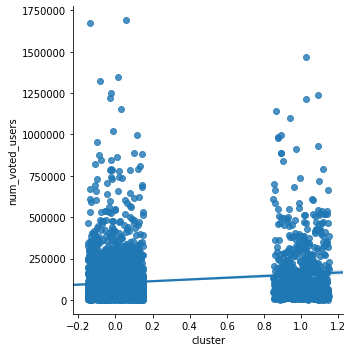

In [122]:

#visualization
sns.lmplot("cluster", "num_voted_users", dfcd, x_jitter=.15, y_jitter=.15)

## Agglomerative clustering


In [123]:
# setting random seed to get the same results each time.
np.random.seed(1)

# build model
agg= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

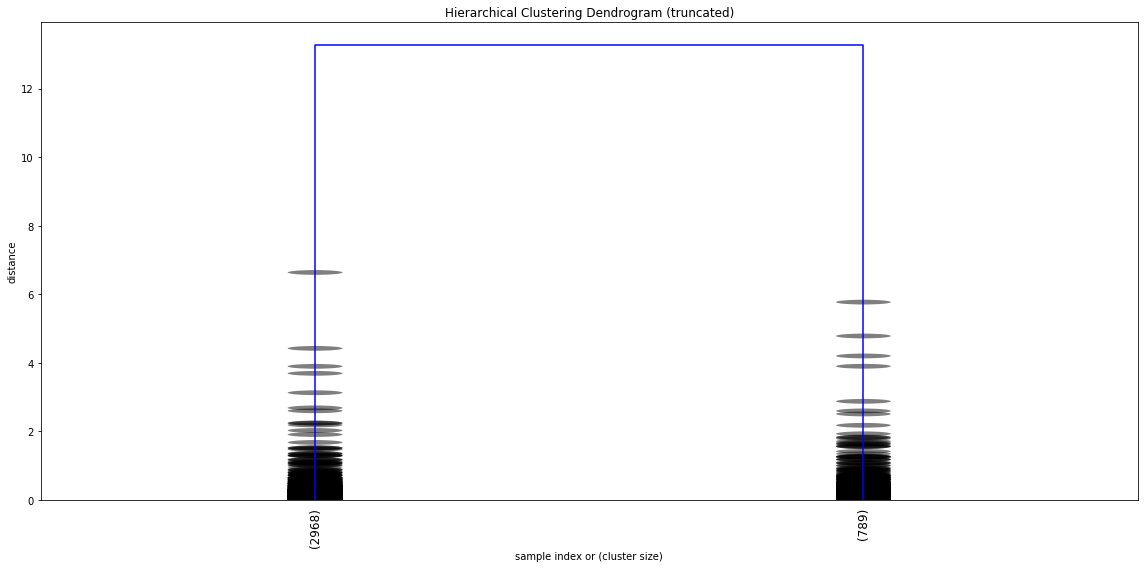

In [124]:
# Visualize dendrogram with p=2

plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=2,                    # show only the last p merged clusters
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,   # get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout()                 # fixes margins

In [125]:

# prepare dataframe for further analysis

# add cluster label into the dataset as a column
aggdf= pd.DataFrame(agg.labels_, columns = ['cluster'])
aggdf.head(3)

cluster
0        0
1        0
2        0

In [126]:

# now merge the cluster and the dataset
# since we already reset the index, the df.join should generate correct result
dfc = df3.join(aggdf)
dfc.tail(3)

num_critic_for_reviews  duration  director_facebook_likes  \
5033                   143.0      77.0                    291.0   
5035                    56.0      81.0                      0.0   
5042                    43.0      90.0                     16.0   

      actor_3_facebook_likes  actor_1_facebook_likes      gross  \
5033                     8.0                   291.0   424760.0   
5035                     6.0                   121.0  2040920.0   
5042                    16.0                    86.0    85222.0   

      num_voted_users  facenumber_in_poster  budget  title_year  \
5033            72639                   0.0  7000.0      2004.0   
5035            52055                   0.0  7000.0      1992.0   
5042             4285                   0.0  1100.0      2004.0   

      actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  \
5033                    45.0         7.0          1.85                 19000   
5035                    20.0         6.9          1.37                     0   
5042                    23.0         6.6          1.85                   456   

      cluster  
5033      NaN  
5035      NaN  
5042      NaN

In [127]:
# total counts per cluster
dfc.groupby('cluster').size()

cluster
0.0     702
1.0    2512
dtype: int64

In [128]:
# mean value of each cluster
dfc.groupby('cluster').mean().T

cluster                           0.0           1.0
num_critic_for_reviews   2.099316e+02  1.638209e+02
duration                 1.173761e+02  1.103169e+02
director_facebook_likes  1.059967e+03  8.370096e+02
actor_3_facebook_likes   1.144306e+03  7.647265e+02
actor_1_facebook_likes   9.728281e+03  7.903816e+03
gross                    8.929752e+07  5.054883e+07
num_voted_users          1.544614e+05  1.035979e+05
facenumber_in_poster     1.357550e+00  1.443869e+00
budget                   7.860104e+07  4.341955e+07
title_year               2.004600e+03  2.003183e+03
actor_2_facebook_likes   2.916990e+03  2.049074e+03
imdb_score               6.497151e+00  6.412022e+00
aspect_ratio             2.168248e+00  2.120776e+00
movie_facebook_likes     1.501690e+04  8.621968e+03

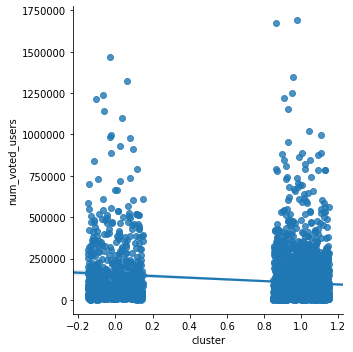

In [129]:

#visualization
sns.lmplot("cluster", "num_voted_users", dfc, x_jitter=.15, y_jitter=.15)

The clustering analysis with two clusters by using both K-Means algorithm and Agglomerative algorithm. Both models generate the similar results.

# Storytelling

As one adjunct to data, the IMDb offers a rating scale that allows users to rate films on a scale of one to ten.IMDb indicates that submitted ratings are filtered and weighted in various ways in order to produce a weighted mean that is displayed for each film, series, and so on.

If you’ve ever picked up a camera, tried to wrangle actors, or sat down to write a script, you know that making movies is not an easy endeavor. There are a lot of moving pieces and continual obstacles to overcome, and even those who’ve been at it a while admit it’s difficult. 

Every great movie is filled with obstacles that a hero must overcome to achieve his goal. Sometimes great obstacles, however, don’t just stay on the script page. Instead, they become part of a film’s actual production. Movies are epic endeavors, especially when they're helmed by filmmakers with grand visions. But along with those high standards and incredible goals come all sorts of production nightmares. The movies on this list almost didn't get made thanks to production struggles that brought the process to a halt.

After a script is written or an idea is pitched, a studio needs to agree to put up financing for a movie’s production. It’s hard to imagine now that a classic like Star Wars, which has generated billions of dollars, had trouble getting financing. Many industry insiders even thought it would become the “laughing stock of Hollywood.” 

When looking what kind of movie that does best you want to make sure that it is in english and color. There are a number of direcotrs who have an everage score of over 7.5 (which what I would consider to be successful) see above for a list.

You can also when examining to see if the there is a correlation between different variables, you can see that certain directors are very correlated to a high imdb score. I also exaaminded to see if there was a correlation between the budget and the scoret which I found that higher budgeted movies tended to do better. While there were some outliers, the correlation analysis and charts told me this. I also focused on the content rating at the begining and decided that it was not nearly as important as I was orginally thinking it was going to be.

    Important Factors when looking at how successful a movie will be
    -the duration
    -Number of reviews from critics 
    -the number of reviews from viewers 
    -The popularity of all actors involved
    -The budget of the movie